In [1]:
import glob
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN

# UMA with speed at 22.22 m/s

Before using the data, this data need to be read with Pandas library and then the dataframe objects will be created from the command below.

In [2]:
traj01 = pd.read_csv('UE0_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE0_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE1_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE1_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE2_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE2_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE3_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE3_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE4_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE4_18-11-2021_23-38-11.csv', low_memory=False,  header=None)

In [3]:
traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]


The plot feature in matplotlib library was used to visualize the figure of the data.

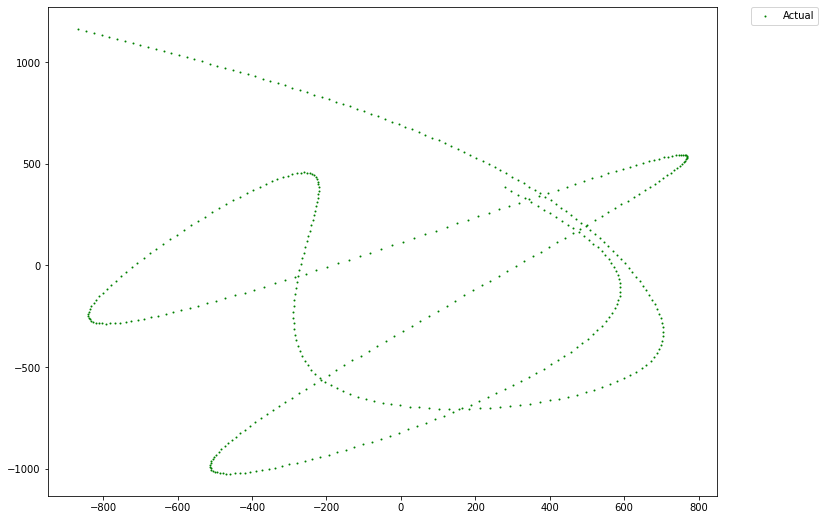

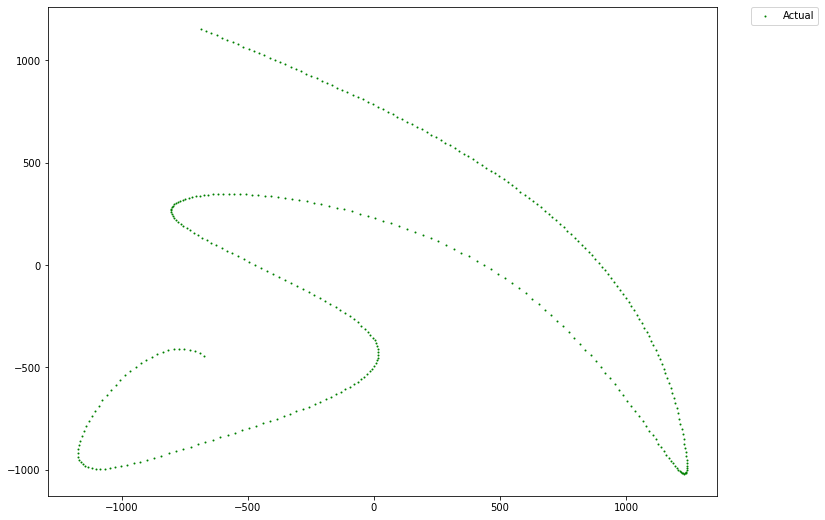

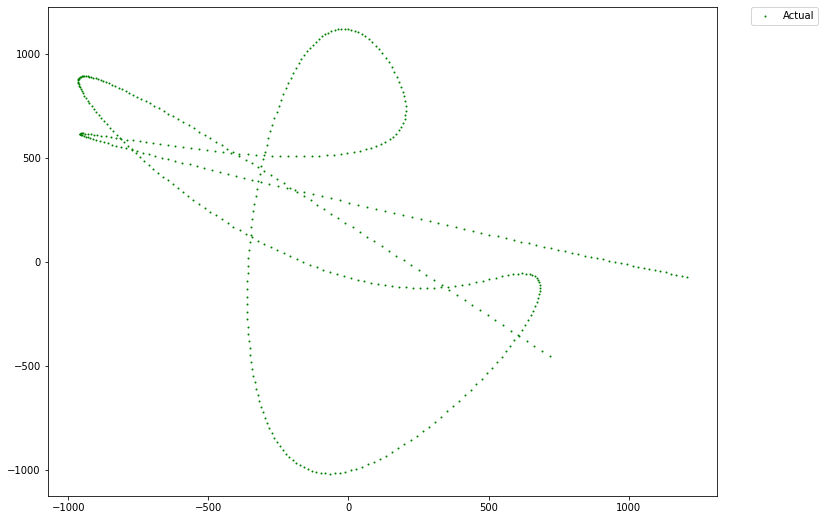

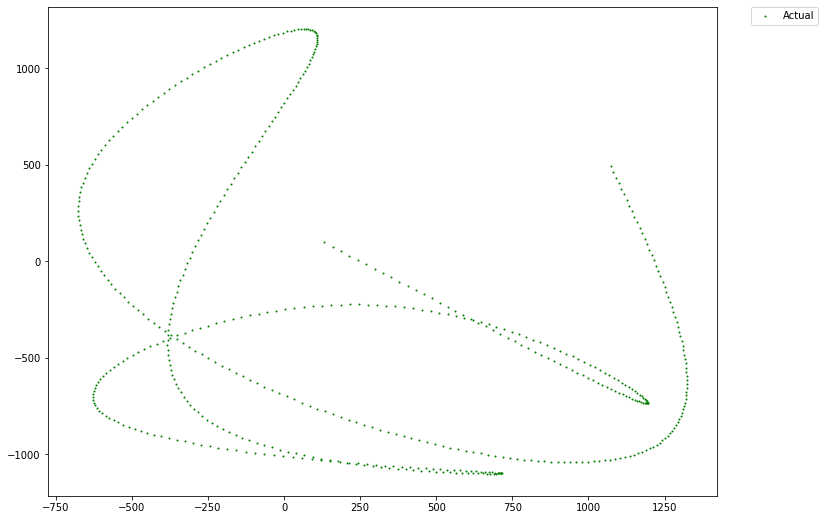

In [4]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj03['X'],traj03['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj06['X'],traj06['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj10['X'],traj10['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Transform the X and Y position of the data into time series problem corresponding the supervise learning problem and then scale it in the range of -1 to 1. 

In [5]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 1, 1)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 1, 1)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 1, 1)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 1, 1)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000   1.000000 -0.974398  0.990944
2  -0.974398   0.990944 -0.948799  0.981885
3  -0.948799   0.981885 -0.923207  0.972821
4  -0.923207   0.972821 -0.897626  0.963747
5  -0.897626   0.963747 -0.872060  0.954661
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.966739 -0.995142
2   0.966739  -0.995142  0.933490 -0.990278
3   0.933490  -0.990278  0.900268 -0.985404
4   0.900268  -0.985404  0.867084 -0.980514
5   0.867084  -0.980514  0.833951 -0.975604
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.596960   1.000000 -0.579516  0.990049
2  -0.579516   0.990049 -0.562075  0.980097
3  -0.562075   0.980097 -0.544637  0.970140
4  -0.544637   0.970140 -0.527204  0.960179
5  -0.527204   0.960179 -0.509779  0.950209
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -0.697563 -0.970668 -0.706060
2  -0.970668  -0.706060 -0.941347 -0.714551
3  -0.941347  -0.714551 -0.912046 

Concatenate 10 routes into 1 dataset

In [7]:
frames = [reframed, reframed_2, reframed_3,reframed_4,reframed_5,reframed_6,reframed_7,reframed_8,reframed_9,reframed_10]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

,var1(t-1),var2(t-1),var1(t),var2(t)
5249,0.793571,0.255532,0.784823,0.280756
5250,0.784823,0.280756,0.776034,0.306016
5251,0.776034,0.306016,0.767212,0.331303
5252,0.767212,0.331303,0.758368,0.356608
5253,0.758368,0.356608,0.749511,0.381925


Split data into test and train dataset for machine learning

In [8]:
# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, 2:]
test_X, test_y = test[:, :-2], test[:, 2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1051, 1, 2) (1051, 2) (4203, 1, 2) (4203, 2)


In [9]:
train[:, :-6].shape,train[:, 10:].shape

((1051, 0), (1051, 0))

Show the example of how the dataset can be fitted with single LSTM model

Note: this model will not be used for testing.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17152     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
15/15 - 20s - loss: 0.4407 - accuracy: 0.6013 - val_loss: 0.5016 - val_accuracy: 0.7552
Epoch 2/600
15/15 - 0s - loss: 0.4287 - accuracy: 0.8059 - val_loss: 0.4892 - val_accuracy: 0.8463
Epoch 3/600
15/15 - 0s - loss: 0.4174 - accuracy: 0.8887 - val_loss: 0.4764 - val_accuracy: 0.8746
Epoch 4/600
15/15 - 0s - loss: 0.4056 - accuracy: 0.9486 - val_loss: 0.4628 - val_ac

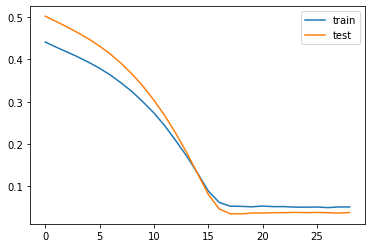

In [10]:
# design single LSTM network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(LSTM(64,activation='relu' ,input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
model1.summary()
# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


Fit the dataset with Bidirectional LSTM which is the upgrade version of single LSTM model

Note: we will concentrate on testing this model with every scenario we test.

Epoch 1/600
15/15 - 15s - loss: 0.4115 - accuracy: 0.8801 - val_loss: 0.4436 - val_accuracy: 0.9381
Epoch 2/600
15/15 - 0s - loss: 0.3613 - accuracy: 0.9686 - val_loss: 0.3845 - val_accuracy: 0.9669
Epoch 3/600
15/15 - 0s - loss: 0.3073 - accuracy: 0.9791 - val_loss: 0.3172 - val_accuracy: 0.9764
Epoch 4/600
15/15 - 0s - loss: 0.2445 - accuracy: 0.9829 - val_loss: 0.2371 - val_accuracy: 0.9843
Epoch 5/600
15/15 - 0s - loss: 0.1699 - accuracy: 0.9857 - val_loss: 0.1401 - val_accuracy: 0.9876
Epoch 6/600
15/15 - 0s - loss: 0.0801 - accuracy: 0.9886 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 7/600
15/15 - 0s - loss: 0.0249 - accuracy: 0.9905 - val_loss: 0.0212 - val_accuracy: 0.9888
Epoch 8/600
15/15 - 0s - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.0211 - val_accuracy: 0.9905
Epoch 9/600
15/15 - 0s - loss: 0.0206 - accuracy: 0.9943 - val_loss: 0.0172 - val_accuracy: 0.9883
Epoch 10/600
15/15 - 0s - loss: 0.0218 - accuracy: 0.9943 - val_loss: 0.0184 - val_accuracy: 0.9900
Epoch 11

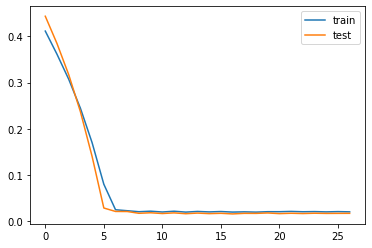

In [11]:
from keras.layers import Bidirectional

# design network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(Bidirectional(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]))))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Show the Accuracy and Loss when fitting the model with the dataset

In [12]:
yhat = model1.predict(test_X)
Loss, accuracy = model1.evaluate(test_X, test_y)
print('Accuracy: %.4f' % (accuracy*100))

# calculate Loss
print('Loss: %.6f' % Loss)

132/132 [==============================] - 0s 812us/step - loss: 0.0159 - accuracy: 0.9914
Accuracy: 99.1435
Loss: 0.015893


Now, start predicting the data by feeding testx and trainx to generate the predicted dataset

In [13]:
# make a prediction
yhat = model1.predict(test_X)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)

# make a prediction
yhat2 = model1.predict(train_X)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmseL = rmse
print('Test RMSE: %.6f' % rmse)

# invert scaling for forecast
inv_yhat2 = scaler.inverse_transform(yhat2)
# invert scaling for actual
inv_y2 = scaler.inverse_transform(train_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Train RMSE: %.6f' % rmse)

import numpy as np
inv_f = np.concatenate((inv_yhat2, inv_yhat), axis=0)
inv_f

inv_o = np.concatenate((inv_y2, inv_y), axis=0)
inv_f,inv_o

Test RMSE: 17.825088
Train RMSE: 15.266498


(array([[-847.11945, 1162.2964 ],
        [-826.89764, 1152.863  ],
        [-806.6484 , 1143.4028 ],
        ...,
        [ 589.40314,  397.56647],
        [ 582.4564 ,  425.2343 ],
        [ 575.47894,  452.91605]], dtype=float32),
 array([[-846.06476, 1154.0919 ],
        [-825.13226, 1144.1808 ],
        [-804.20575, 1134.2628 ],
        ...,
        [ 578.0631 ,  432.3728 ],
        [ 570.8313 ,  460.05994],
        [ 563.58887,  487.75888]], dtype=float32))

Plot X and Y positions with time and show RSME for both X and Y from comparing actual and predicted data

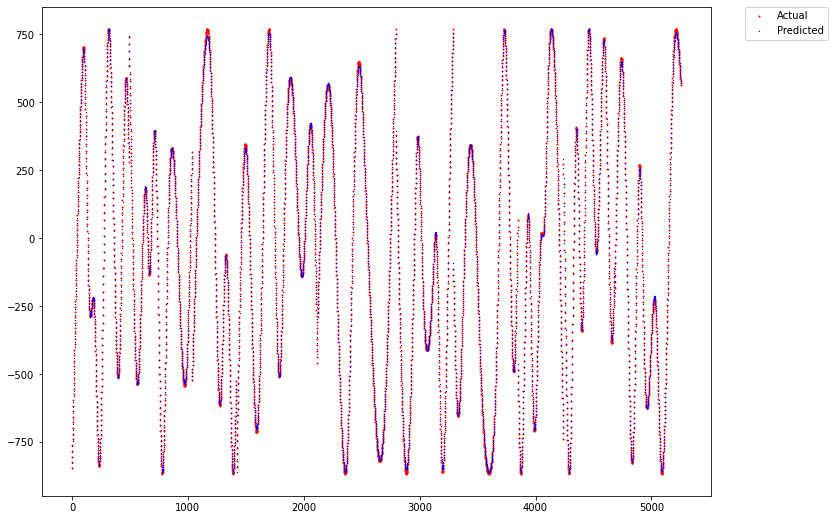

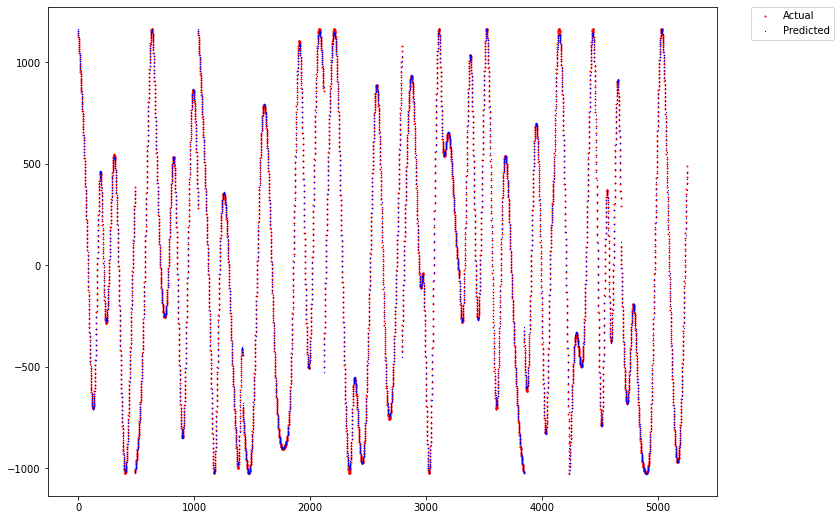

RMSE for X in Train dataset: 14.166653
RMSE for Y in Train dataset: 16.292264
RMSE for X in Test dataset: 15.903472
RMSE for Y in Test dataset: 19.558830


In [14]:
fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,0], inv_yhat2[:,0]))
print('RMSE for X in Train dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,1], inv_yhat2[:,1]))
print('RMSE for Y in Train dataset: %.6f' % rmse)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('RMSE for X in Test dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('RMSE for Y in Test dataset: %.6f' % rmse)

Plot all 10 routes for both X and Y positions

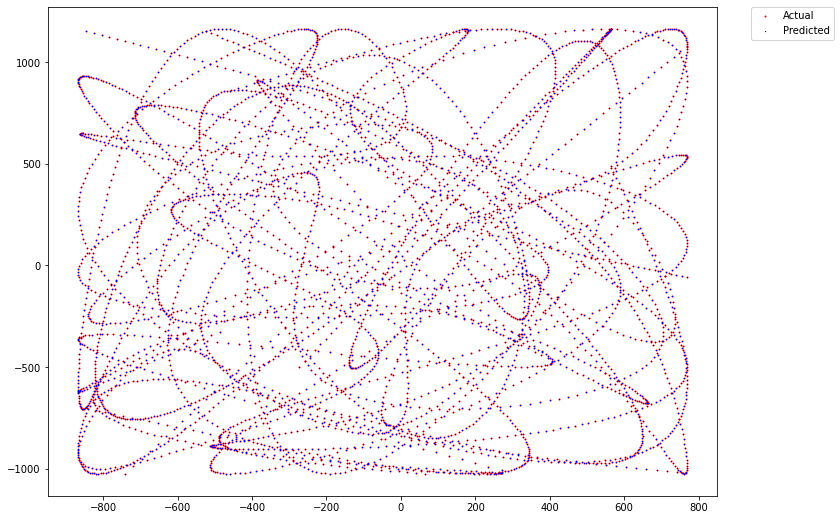

In [15]:

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Feed random 6 paths to ML for predicting

Read 6 routes with pandas function

In [16]:
traj11 = pd.read_csv('UE5_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj12 = pd.read_csv('UE5_18-11-2021_23-38-11.csv', low_memory=False,  header=None)
traj13 = pd.read_csv('UE6_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj14 = pd.read_csv('UE7_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj15 = pd.read_csv('UE8_18-11-2021_23-37-17.csv', low_memory=False,  header=None)
traj16 = pd.read_csv('UE9_18-11-2021_23-37-17.csv', low_memory=False,  header=None)

traj11.columns = ["X", "Y", "Speed", "Time"]
traj12.columns = ["X", "Y", "Speed", "Time"]
traj13.columns = ["X", "Y", "Speed", "Time"]
traj14.columns = ["X", "Y", "Speed", "Time"]
traj15.columns = ["X", "Y", "Speed", "Time"]
traj16.columns = ["X", "Y", "Speed", "Time"]

Plot sample routes

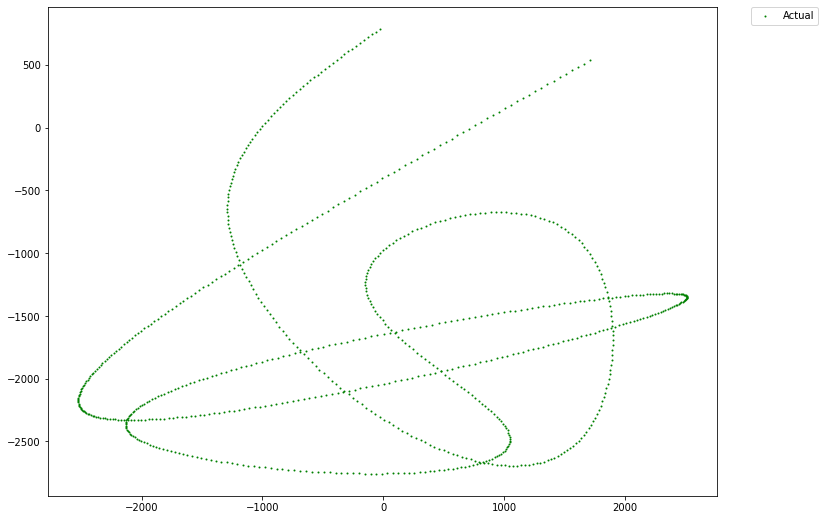

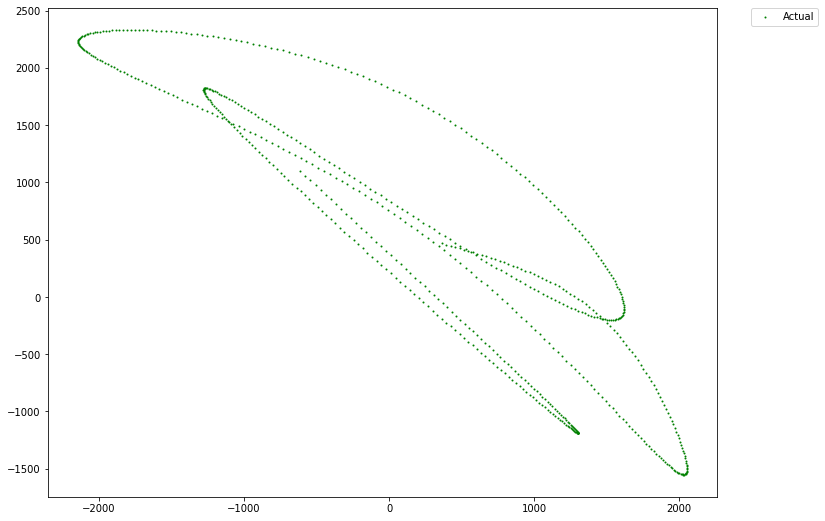

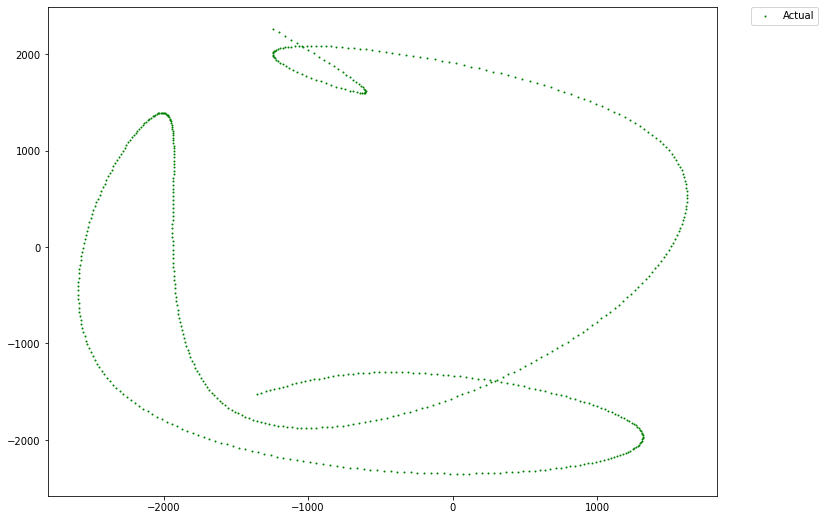

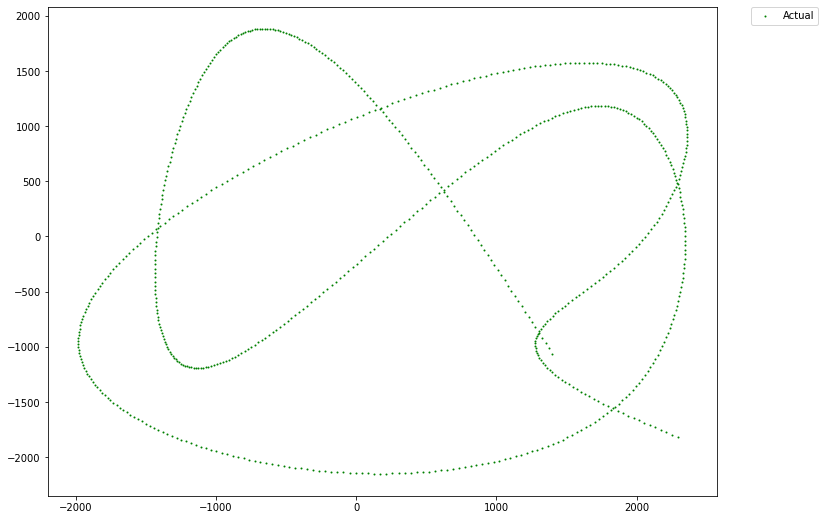

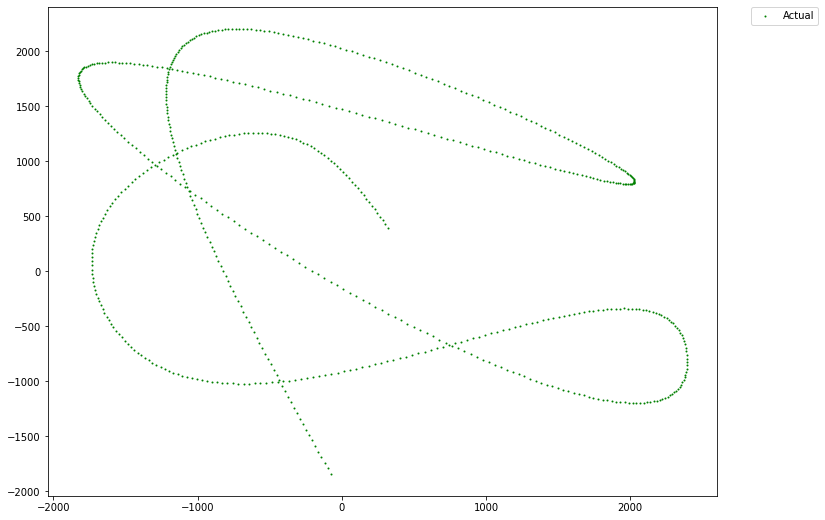

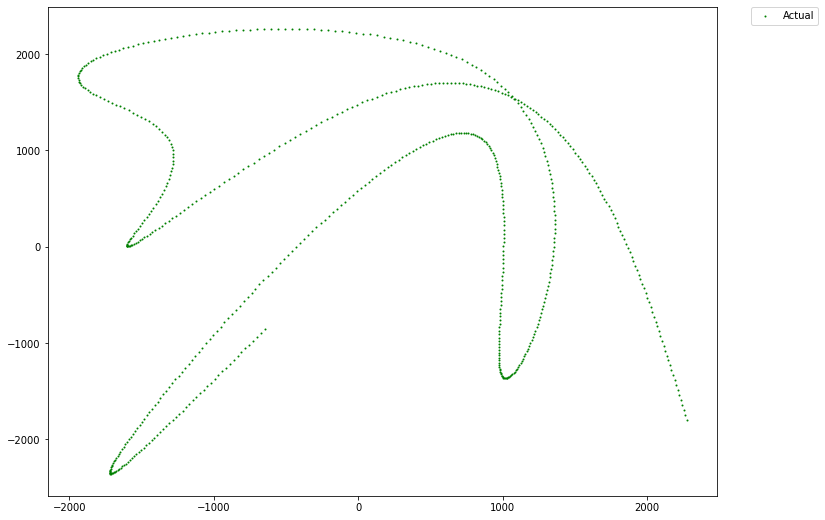

In [156]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj11['X'],traj11['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj12['X'],traj12['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj13['X'],traj13['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj14['X'],traj14['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj15['X'],traj15['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj16['X'],traj16['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



Transform the X and Y position of the data into time series problem corresponding the supervise learning problem and then scale it in the range of -1 to 1.

In [111]:
new_df_2 = traj12
new_df_3 = traj13
new_df_4 = traj14
new_df_5 = traj15
new_df_6 = traj16



#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


frames = [reframed_2, reframed_3,reframed_4,reframed_5,reframed_6]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -1.000000  0.978401 -0.992316
2   0.978401  -0.992316  0.956806 -0.984631
3   0.956806  -0.984631  0.935216 -0.976942
4   0.935216  -0.976942  0.913635 -0.969249
5   0.913635  -0.969249  0.892066 -0.961549
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.342859  -0.669373  0.319767 -0.676399
2   0.319767  -0.676399  0.296684 -0.683413
3   0.296684  -0.683413  0.273621 -0.690401
4   0.273621  -0.690401  0.250586 -0.697353
5   0.250586  -0.697353  0.227590 -0.704254
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.527466  -1.000000 -0.501440 -0.978305
2  -0.501440  -0.978305 -0.475421 -0.956622
3  -0.475421  -0.956622 -0.449416 -0.934964
4  -0.449416  -0.934964 -0.423430 -0.913343
5  -0.423430  -0.913343 -0.397472 -0.891772
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.328236  -0.604213  0.319605 -0.573340
2   0.319605  -0.573340  0.311006 -0.542490
3   0.311006  -0.542490  0.302470 -0.511685
4   0.302470  -0.511685  0.29402

,var1(t-1),var2(t-1),var1(t),var2(t)
2535,0.993628,0.440395,0.992266,0.479744
2536,0.992266,0.479744,0.990829,0.519224
2537,0.990829,0.519224,0.989335,0.558810
2538,0.989335,0.558810,0.987797,0.598471
2539,0.987797,0.598471,0.986233,0.638182


Predict the data from given input and plot comparison between actual and predicted data of X, Y positions with time,and plot all 6 routes with X and Y positions in the last picture.

Test RMSE: 0.333145


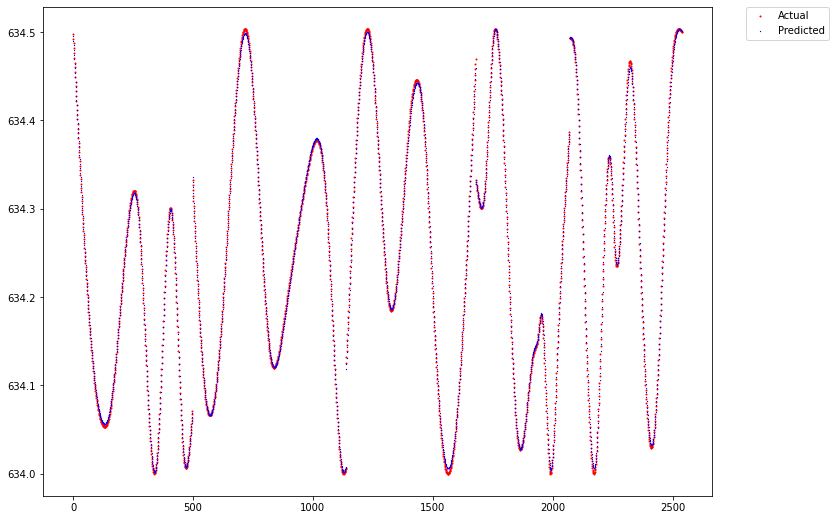

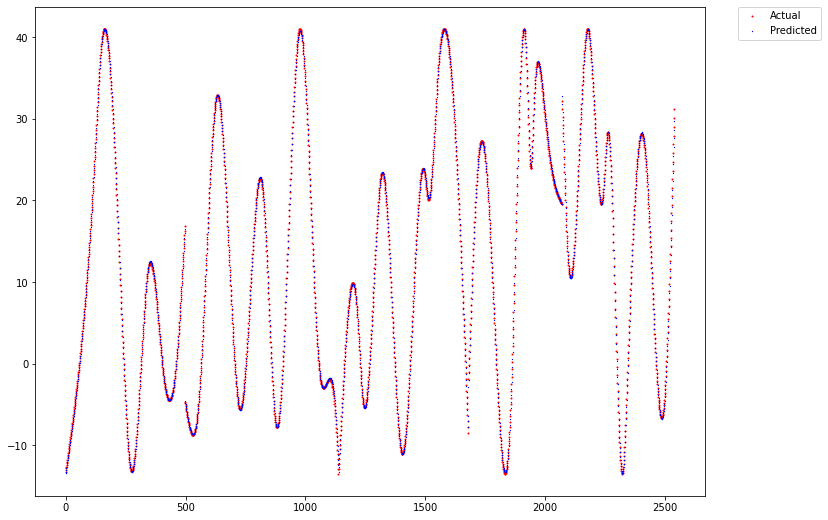

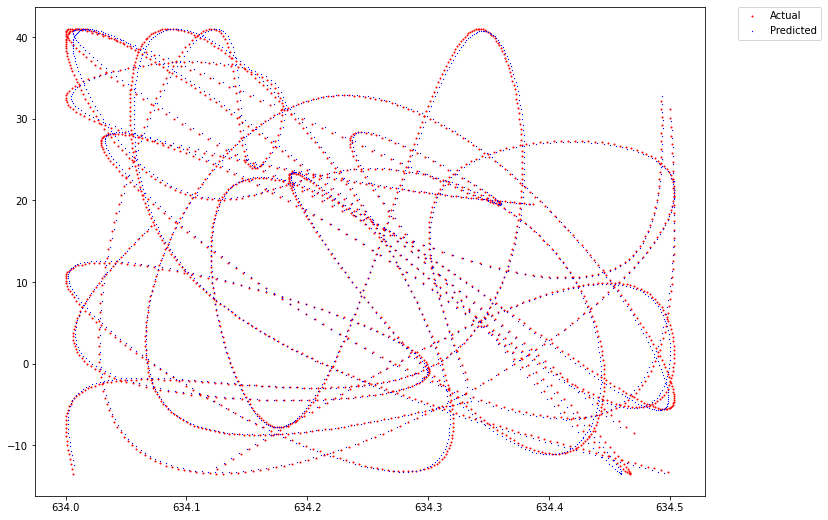

In [112]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# UMI with the speed at 11.11 m/s

In [113]:
traj01 = pd.read_csv('UE0_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE0_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE1_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE1_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE2_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE2_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE3_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE3_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE4_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE4_18-11-2021_23-40-49.csv', low_memory=False,  header=None)

traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]


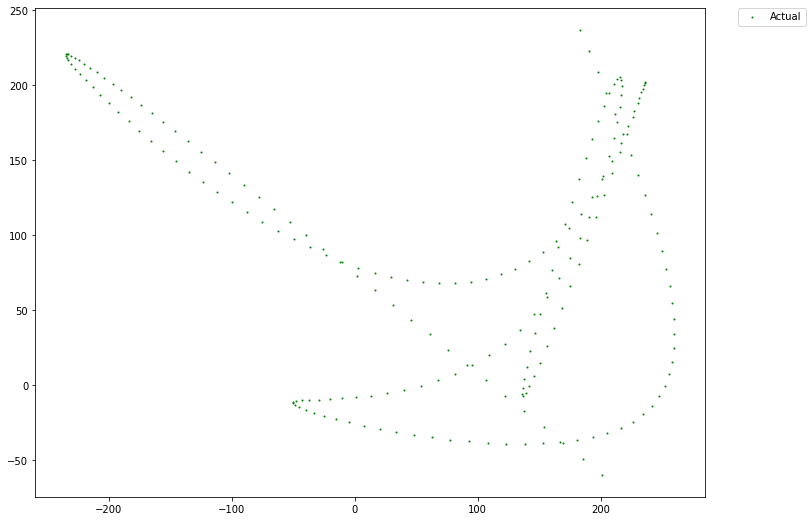

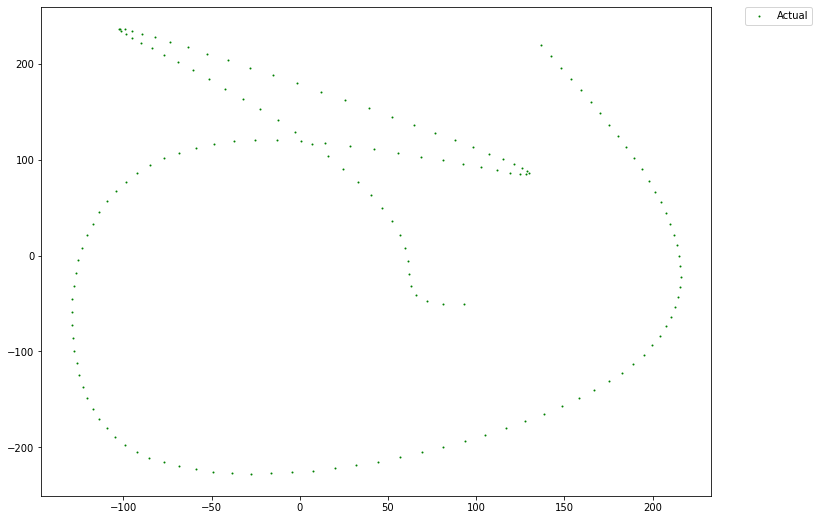

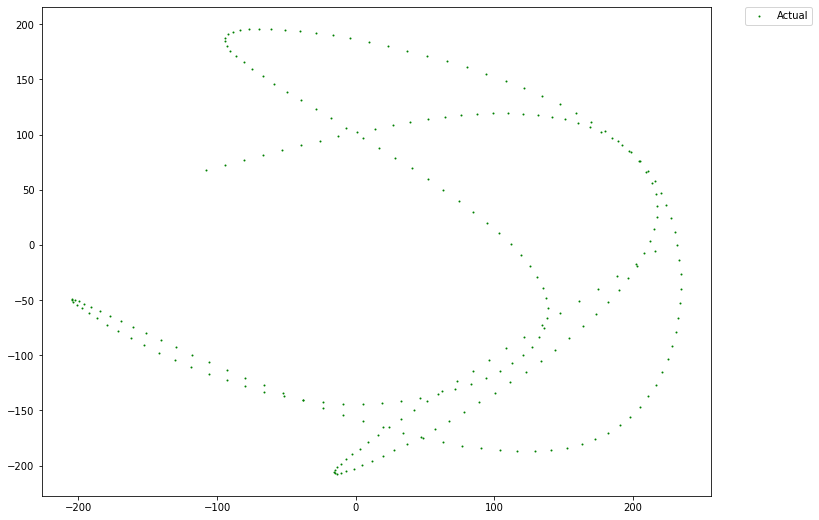

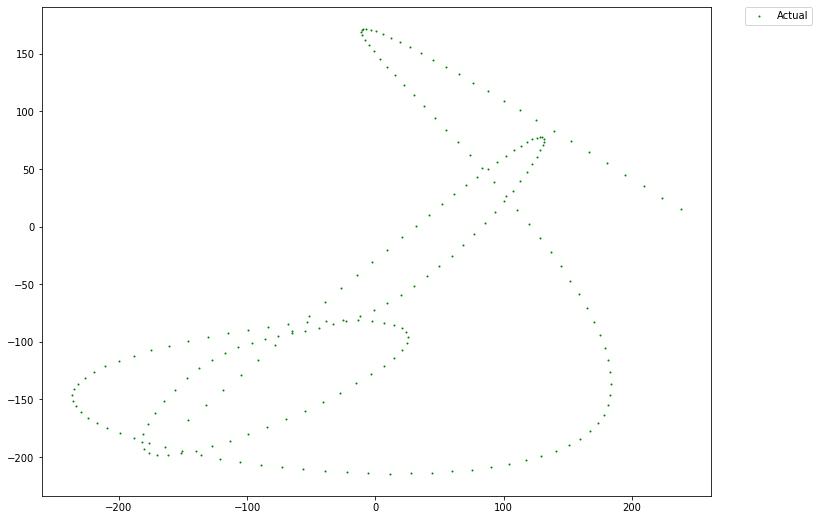

In [114]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj03['X'],traj03['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj06['X'],traj06['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj10['X'],traj10['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [115]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 1, 1)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 1, 1)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 1, 1)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 1, 1)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.689602   1.000000  0.718718  0.904976
2   0.718718   0.904976  0.747605  0.810178
3   0.747605   0.810178  0.776035  0.715830
4   0.776035   0.715830  0.803779  0.622159
5   0.803779   0.622159  0.830609  0.529390
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.170231   1.000000 -0.204094  0.925770
2  -0.204094   0.925770 -0.237765  0.851716
3  -0.237765   0.851716 -0.271053  0.778013
4  -0.271053   0.778013 -0.303767  0.704837
5  -0.303767   0.704837 -0.335716  0.632363
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.542566   0.928570  0.575578  0.877084
2   0.575578   0.877084  0.608437  0.825623
3   0.608437   0.825623  0.640990  0.774211
4   0.640990   0.774211  0.673083  0.722873
5   0.673083   0.722873  0.704564  0.671634
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   1.000000  -0.243938  0.932273 -0.228657
2   0.932273  -0.228657  0.865270 -0.213161
3   0.865270  -0.213161  0.799713 

In [116]:
frames = [reframed, reframed_2, reframed_3,reframed_4,reframed_5,reframed_6,reframed_7,reframed_8,reframed_9,reframed_10]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

,var1(t-1),var2(t-1),var1(t),var2(t)
2057,-0.332549,-0.422214,-0.388708,-0.488554
2058,-0.388708,-0.488554,-0.445393,-0.555631
2059,-0.445393,-0.555631,-0.502484,-0.623275
2060,-0.502484,-0.623275,-0.559860,-0.691320
2061,-0.559860,-0.691320,-0.617401,-0.759597


In [117]:
# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, 2:]
test_X, test_y = test[:, :-2], test[:, 2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(412, 1, 2) (412, 2) (1650, 1, 2) (1650, 2)


Epoch 1/600
6/6 - 4s - loss: 0.5185 - accuracy: 0.2476 - val_loss: 0.5041 - val_accuracy: 0.5521
Epoch 2/600
6/6 - 0s - loss: 0.4918 - accuracy: 0.7112 - val_loss: 0.4793 - val_accuracy: 0.7200
Epoch 3/600
6/6 - 0s - loss: 0.4661 - accuracy: 0.8252 - val_loss: 0.4543 - val_accuracy: 0.7703
Epoch 4/600
6/6 - 0s - loss: 0.4391 - accuracy: 0.8519 - val_loss: 0.4287 - val_accuracy: 0.7915
Epoch 5/600
6/6 - 0s - loss: 0.4120 - accuracy: 0.8689 - val_loss: 0.4023 - val_accuracy: 0.8048
Epoch 6/600
6/6 - 0s - loss: 0.3839 - accuracy: 0.8786 - val_loss: 0.3748 - val_accuracy: 0.8133
Epoch 7/600
6/6 - 0s - loss: 0.3549 - accuracy: 0.8811 - val_loss: 0.3459 - val_accuracy: 0.8224
Epoch 8/600
6/6 - 0s - loss: 0.3235 - accuracy: 0.8981 - val_loss: 0.3156 - val_accuracy: 0.8267
Epoch 9/600
6/6 - 0s - loss: 0.2918 - accuracy: 0.8981 - val_loss: 0.2837 - val_accuracy: 0.8339
Epoch 10/600
6/6 - 0s - loss: 0.2588 - accuracy: 0.8981 - val_loss: 0.2502 - val_accuracy: 0.8461
Epoch 11/600
6/6 - 0s - loss:

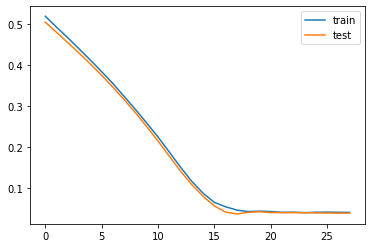

In [118]:
from keras.layers import Bidirectional

# design network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(Bidirectional(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]))))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [119]:
yhat = model1.predict(test_X)
Loss, accuracy = model1.evaluate(test_X, test_y)
print('Accuracy: %.4f' % (accuracy*100))

# calculate Loss
print('Loss: %.6f' % Loss)

52/52 [==============================] - 0s 838us/step - loss: 0.0382 - accuracy: 0.9673
Accuracy: 96.7273
Loss: 0.038193


In [120]:
# make a prediction
yhat = model1.predict(test_X)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)

# make a prediction
yhat2 = model1.predict(train_X)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmseL = rmse
print('Test RMSE: %.6f' % rmse)

# invert scaling for forecast
inv_yhat2 = scaler.inverse_transform(yhat2)
# invert scaling for actual
inv_y2 = scaler.inverse_transform(train_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Train RMSE: %.6f' % rmse)



Test RMSE: 9.221749
Train RMSE: 9.637789


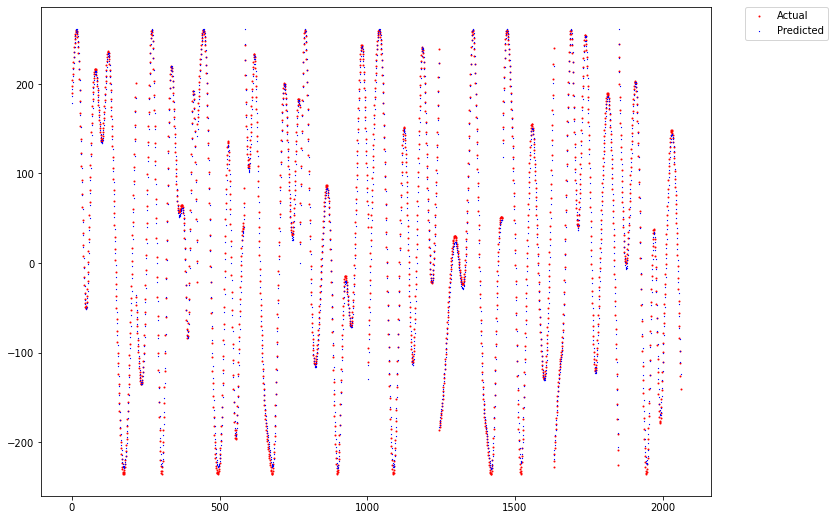

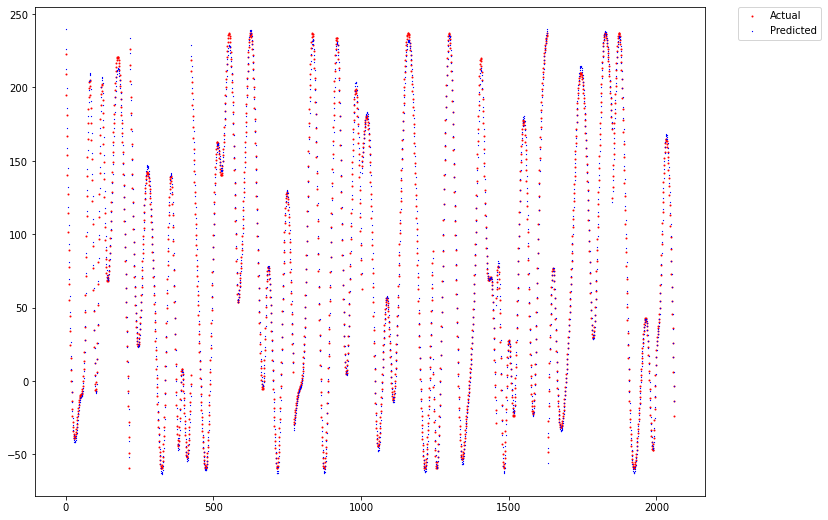

In [121]:
import numpy as np
inv_f = np.concatenate((inv_yhat2, inv_yhat), axis=0)
inv_f

inv_o = np.concatenate((inv_y2, inv_y), axis=0)
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

RMSE for X in Train dataset: 11.050048
RMSE for Y in Train dataset: 7.979372
RMSE for X in Test dataset: 11.399161
RMSE for Y in Test dataset: 6.335645


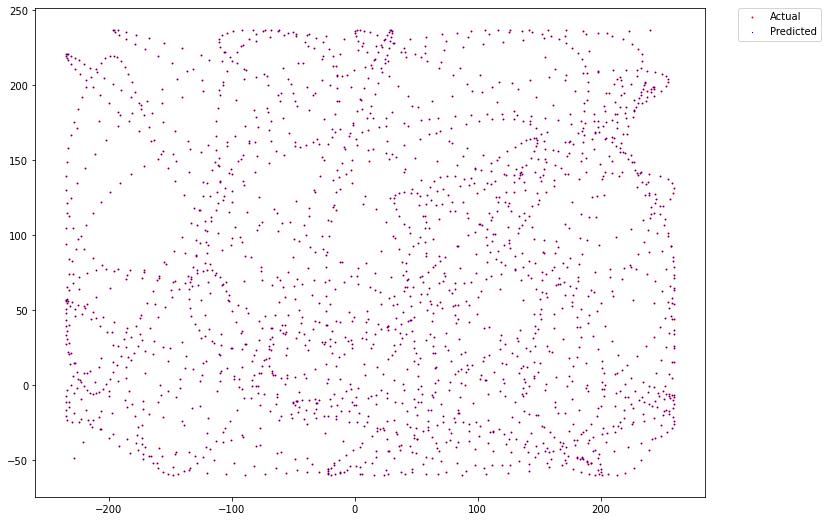

In [122]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,0], inv_yhat2[:,0]))
print('RMSE for X in Train dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,1], inv_yhat2[:,1]))
print('RMSE for Y in Train dataset: %.6f' % rmse)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('RMSE for X in Test dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('RMSE for Y in Test dataset: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Feed random 6 paths to ML for predicting

In [123]:
traj11 = pd.read_csv('UE5_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj12 = pd.read_csv('UE5_18-11-2021_23-40-49.csv', low_memory=False,  header=None)
traj13 = pd.read_csv('UE6_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj14 = pd.read_csv('UE7_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj15 = pd.read_csv('UE8_18-11-2021_23-40-28.csv', low_memory=False,  header=None)
traj16 = pd.read_csv('UE9_18-11-2021_23-40-28.csv', low_memory=False,  header=None)

traj11.columns = ["X", "Y", "Speed", "Time"]
traj12.columns = ["X", "Y", "Speed", "Time"]
traj13.columns = ["X", "Y", "Speed", "Time"]
traj14.columns = ["X", "Y", "Speed", "Time"]
traj15.columns = ["X", "Y", "Speed", "Time"]
traj16.columns = ["X", "Y", "Speed", "Time"]

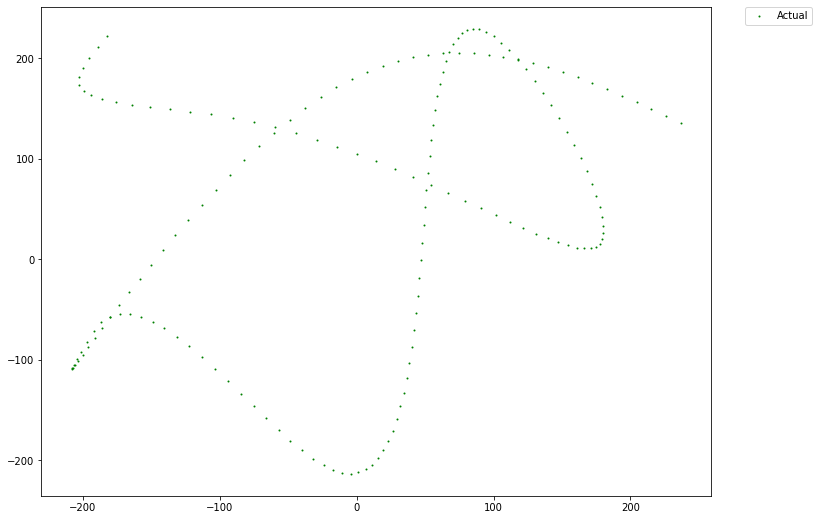

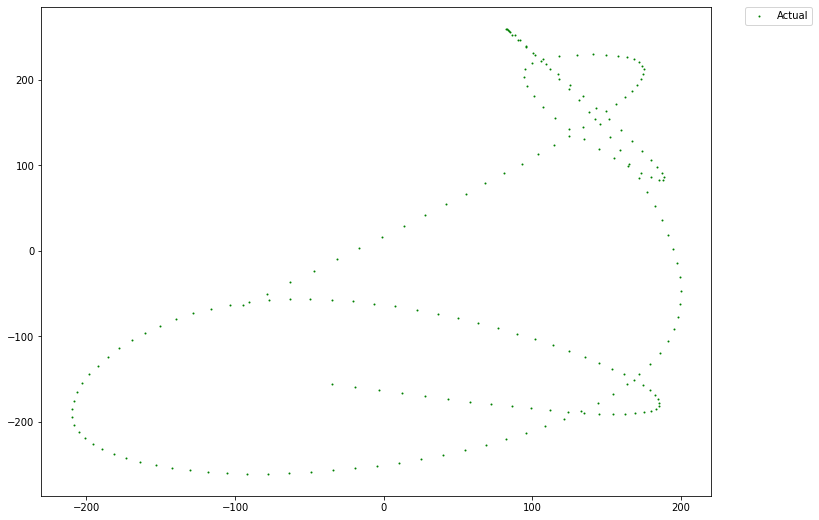

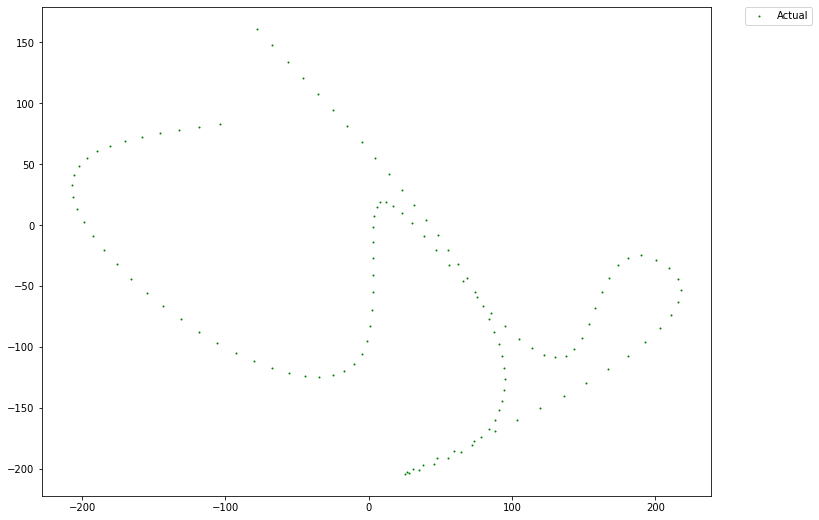

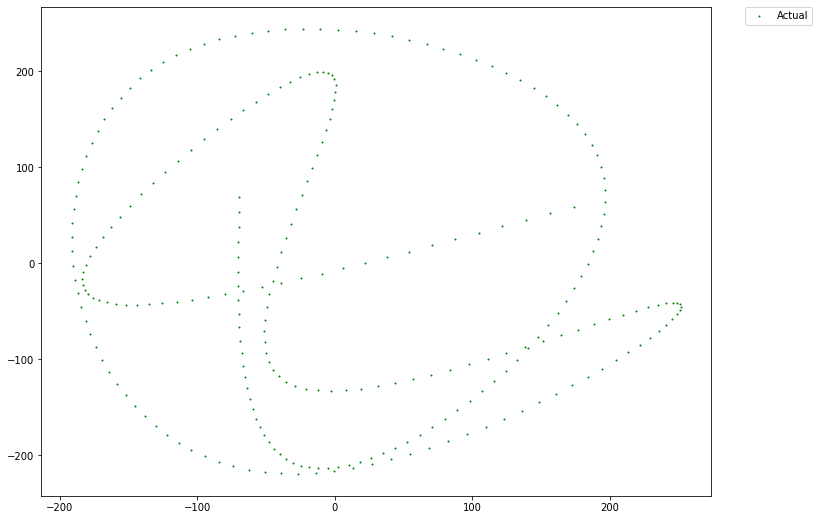

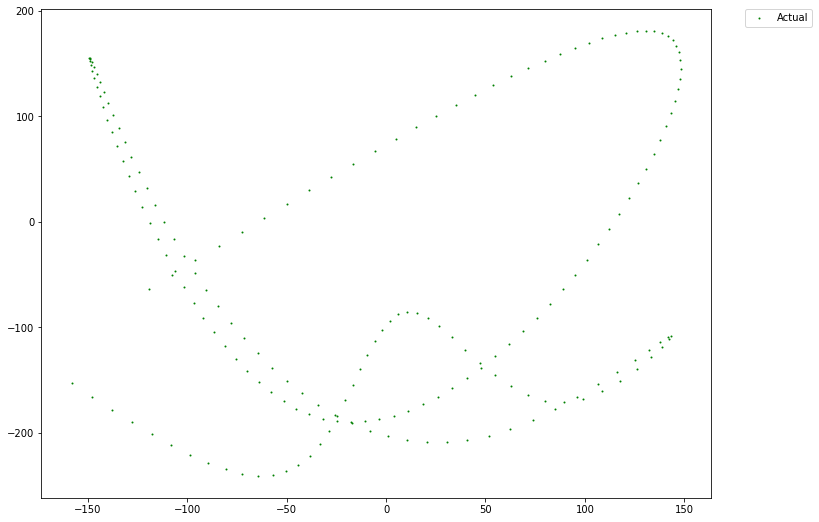

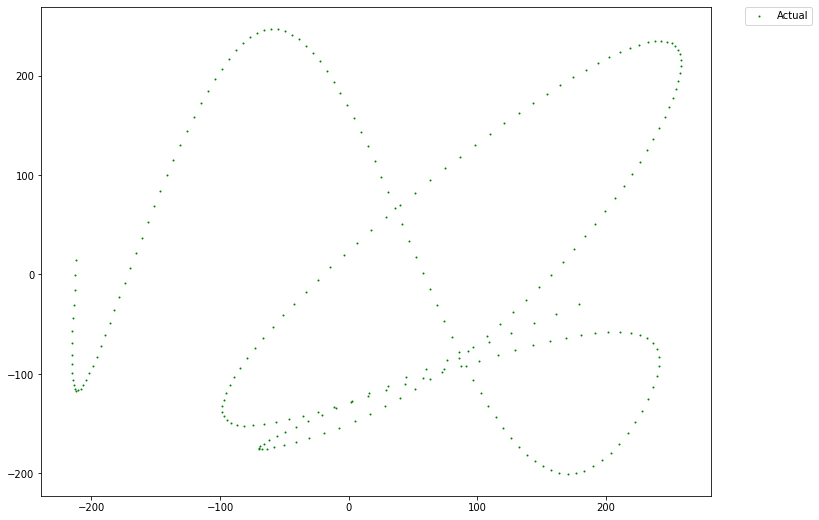

In [124]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj11['X'],traj11['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj12['X'],traj12['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj13['X'],traj13['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj14['X'],traj14['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj15['X'],traj15['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj16['X'],traj16['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [125]:
new_df = traj11


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.883026   0.967938 -0.914331  0.917543
2  -0.914331   0.917543 -0.942422  0.868817
3  -0.942422   0.868817 -0.964085  0.823430
4  -0.964085   0.823430 -0.976106  0.783050
5  -0.976106   0.783050 -0.975448  0.749243


Test RMSE: 10.140980


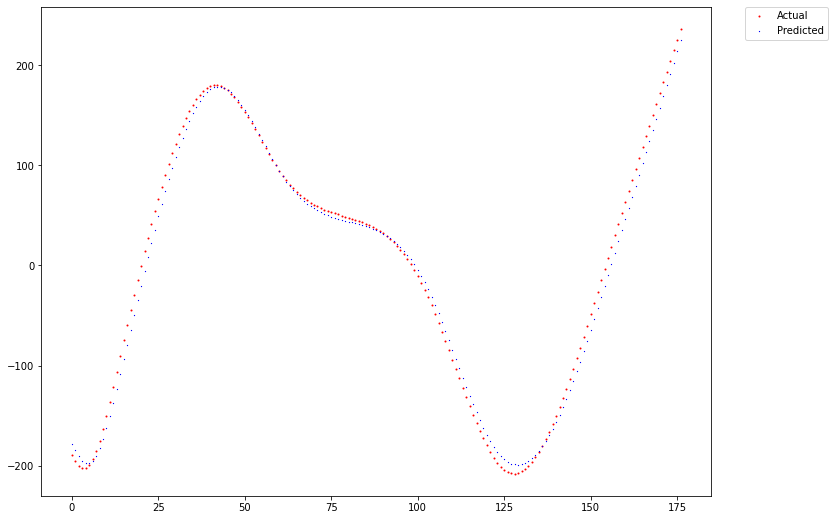

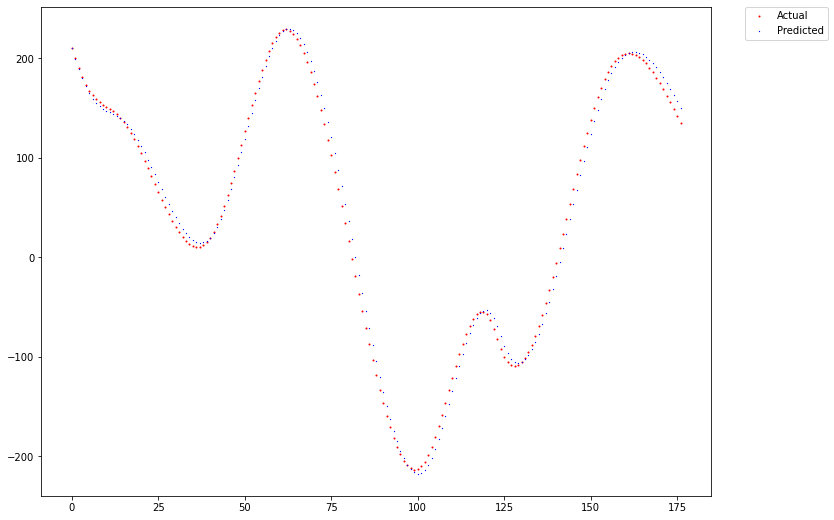

In [126]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



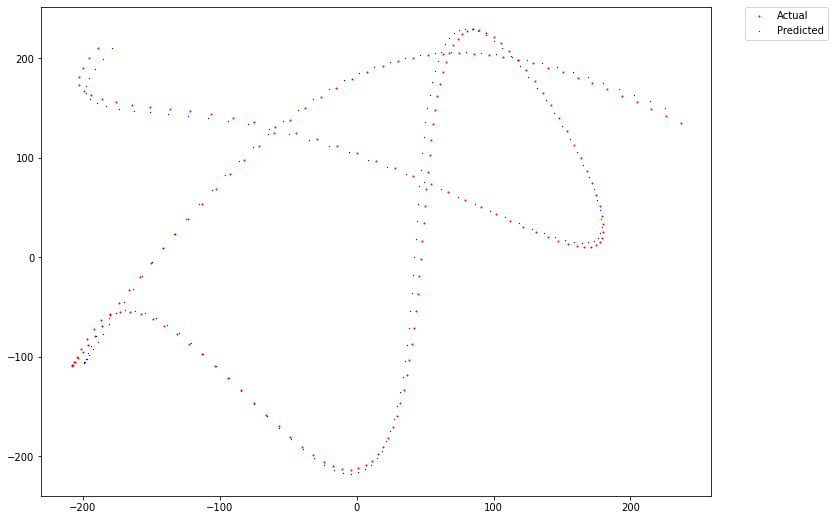

In [127]:
import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [128]:
new_df_2 = traj12
new_df_3 = traj13
new_df_4 = traj14
new_df_5 = traj15
new_df_6 = traj16



#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.146534  -0.597698 -0.068885 -0.611676
2  -0.068885  -0.611676  0.008405 -0.625519
3   0.008405  -0.625519  0.084976 -0.639090
4   0.084976  -0.639090  0.160468 -0.652255
5   0.160468  -0.652255  0.234522 -0.664877
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.392714   1.000000 -0.342182  0.926304
2  -0.342182   0.926304 -0.291823  0.852691
3  -0.291823   0.852691 -0.241811  0.779245
4  -0.241811   0.779245 -0.192319  0.706050
5  -0.192319   0.706050 -0.143521  0.633189
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.649599   0.200138  0.570997  0.170365
2   0.570997   0.170365  0.492560  0.140712
3   0.492560   0.140712  0.414455  0.111301
4   0.414455   0.111301  0.336846  0.082252
5   0.336846   0.082252  0.259898  0.053685
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -1.000000  -0.583905 -0.933241 -0.644573
2  -0.933241  -0.644573 -0.866822 -0.704086
3  -0.866822  -0.704086 -0.801081 -0.761288
4  -0.801081  -0.761288 -0.73635

In [129]:
frames = [reframed_2, reframed_3,reframed_4,reframed_5,reframed_6]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

,var1(t-1),var2(t-1),var1(t),var2(t)
1039,-0.998013,-0.360637,-0.996145,-0.302133
1040,-0.996145,-0.302133,-0.993817,-0.240292
1041,-0.993817,-0.240292,-0.991124,-0.175793
1042,-0.991124,-0.175793,-0.988159,-0.109318
1043,-0.988159,-0.109318,-0.985015,-0.041546


Test RMSE: 9.723038


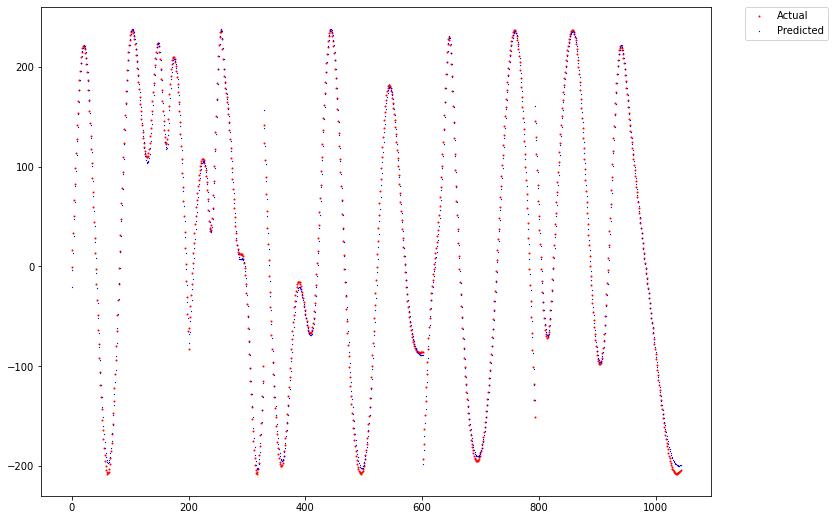

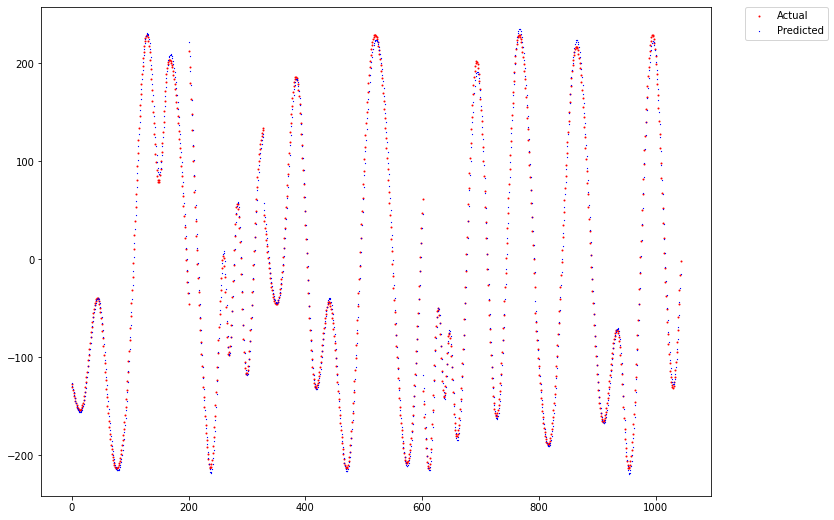

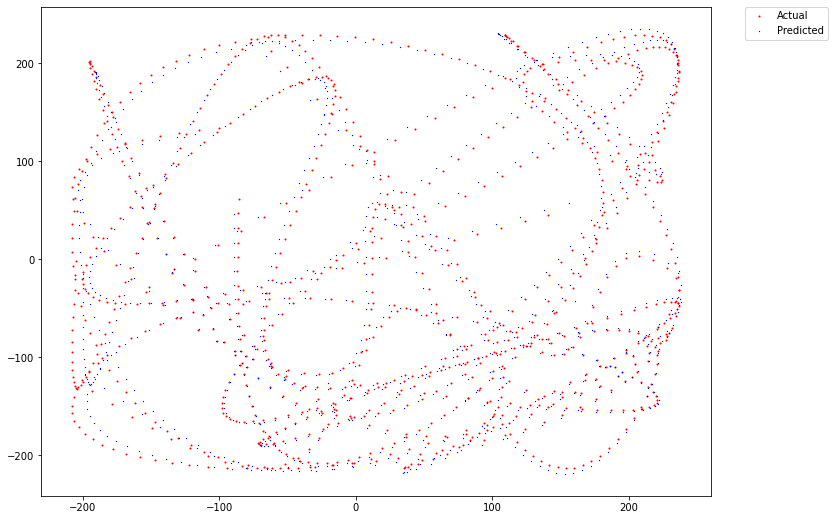

In [130]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# RMA with speed at 33.33 m/s

In [131]:
traj01 = pd.read_csv('UE0_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj02 = pd.read_csv('UE0_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj03 = pd.read_csv('UE1_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj04 = pd.read_csv('UE1_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj05 = pd.read_csv('UE2_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj06 = pd.read_csv('UE2_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj07 = pd.read_csv('UE3_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj08 = pd.read_csv('UE3_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj09 = pd.read_csv('UE4_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj10 = pd.read_csv('UE4_18-11-2021_23-53-21.csv', low_memory=False,  header=None)

traj01.columns = ["X", "Y", "Speed", "Time"]
traj02.columns = ["X", "Y", "Speed", "Time"]
traj03.columns = ["X", "Y", "Speed", "Time"]
traj04.columns = ["X", "Y", "Speed", "Time"]
traj05.columns = ["X", "Y", "Speed", "Time"]
traj06.columns = ["X", "Y", "Speed", "Time"]
traj07.columns = ["X", "Y", "Speed", "Time"]
traj08.columns = ["X", "Y", "Speed", "Time"]
traj09.columns = ["X", "Y", "Speed", "Time"]
traj10.columns = ["X", "Y", "Speed", "Time"]


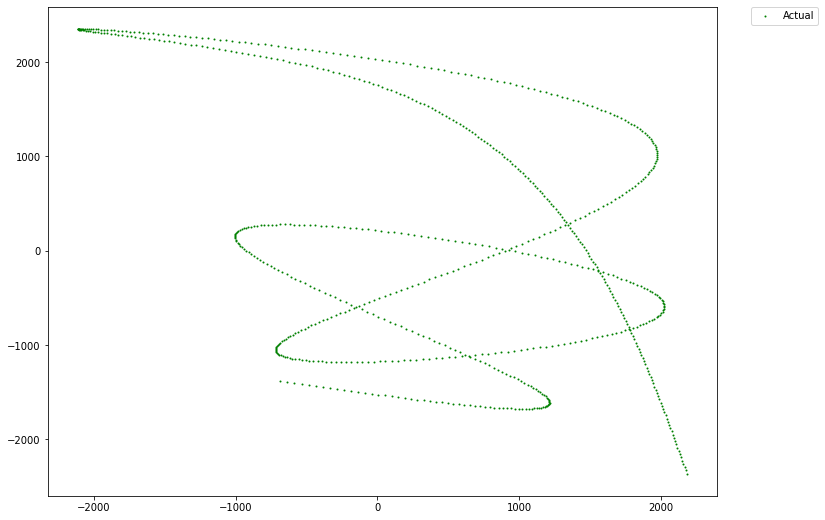

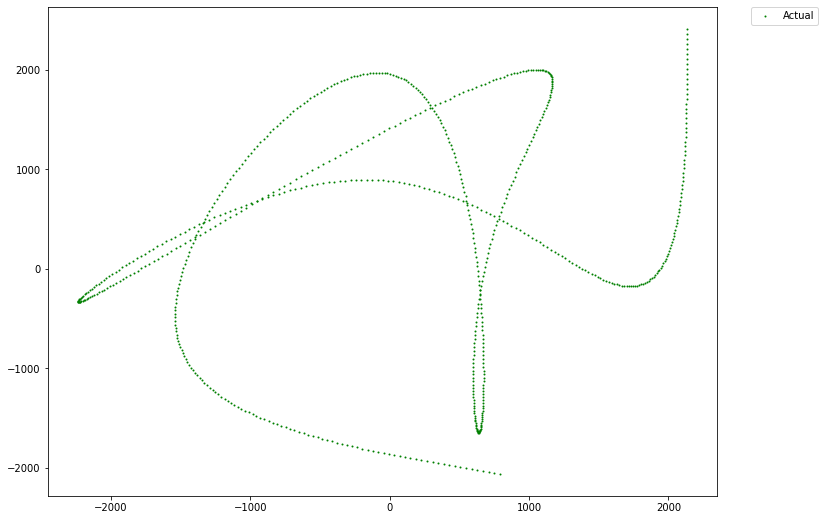

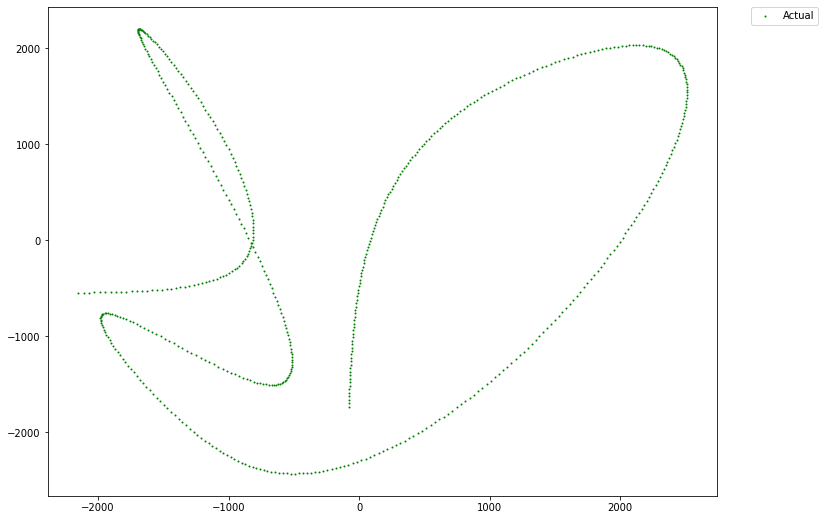

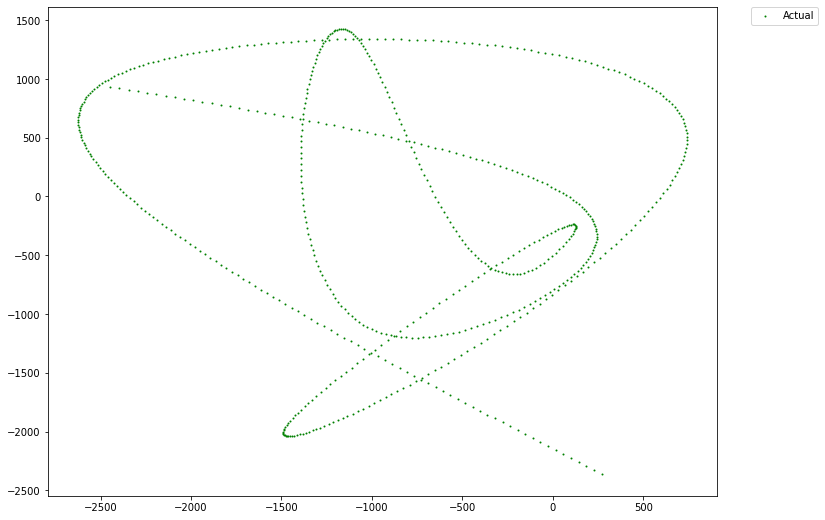

In [132]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj01['X'],traj01['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj03['X'],traj03['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj06['X'],traj06['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj10['X'],traj10['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [133]:
new_df_1 = traj01
new_df_2 = traj02
new_df_3 = traj03
new_df_4 = traj04
new_df_5 = traj05
new_df_6 = traj06
new_df_7 = traj07
new_df_8 = traj08
new_df_9 = traj09
new_df_10 = traj10


#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df_1[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


# load dataset
dataset = new_df_7[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler7 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler7.fit_transform(values)
# frame as supervised learning
reframed_7 = series_to_supervised(scaled, 1, 1)

print(reframed_7.head())

# load dataset
dataset = new_df_8[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler8 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler8.fit_transform(values)
# frame as supervised learning
reframed_8 = series_to_supervised(scaled, 1, 1)
print(reframed_8.head())

# load dataset
dataset = new_df_9[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler9 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler9.fit_transform(values)
# frame as supervised learning
reframed_9 = series_to_supervised(scaled, 1, 1)
print(reframed_9.head())

# load dataset
dataset = new_df_10[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler10 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler10.fit_transform(values)
# frame as supervised learning
reframed_10 = series_to_supervised(scaled, 1, 1)
print(reframed_10.head())

   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.336627  -0.583678 -0.313062 -0.588220
2  -0.313062  -0.588220 -0.289513 -0.592756
3  -0.289513  -0.592756 -0.265993 -0.597282
4  -0.265993  -0.597282 -0.242517 -0.601791
5  -0.242517  -0.601791 -0.219101 -0.606279
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.067901  -0.995070 -0.059263 -0.975679
2  -0.059263  -0.975679 -0.050627 -0.956289
3  -0.050627  -0.956289 -0.041997 -0.936902
4  -0.041997  -0.936902 -0.033375 -0.917520
5  -0.033375  -0.917520 -0.024764 -0.898143
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.385964  -1.000000  0.367375 -0.995856
2   0.367375  -0.995856  0.348791 -0.991708
3   0.348791  -0.991708  0.330217 -0.987554
4   0.330217  -0.987554  0.311658 -0.983390
5   0.311658  -0.983390  0.293120 -0.979213
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.461185   0.117321 -0.478617  0.128497
2  -0.478617   0.128497 -0.496032  0.139661
3  -0.496032   0.139661 -0.513414 

In [134]:
frames = [reframed, reframed_2, reframed_3,reframed_4,reframed_5,reframed_6,reframed_7,reframed_8,reframed_9,reframed_10]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

# split into train and test sets
values = reframed.values
n_train = round(reframed.shape[0]*0.2)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, 2:]
test_X, test_y = test[:, :-2], test[:, 2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1406, 1, 2) (1406, 2) (5625, 1, 2) (5625, 2)


Epoch 1/600
20/20 - 5s - loss: 0.4612 - accuracy: 0.8329 - val_loss: 0.4300 - val_accuracy: 0.9136
Epoch 2/600
20/20 - 0s - loss: 0.3861 - accuracy: 0.9253 - val_loss: 0.3533 - val_accuracy: 0.9484
Epoch 3/600
20/20 - 0s - loss: 0.3032 - accuracy: 0.9481 - val_loss: 0.2623 - val_accuracy: 0.9623
Epoch 4/600
20/20 - 0s - loss: 0.2042 - accuracy: 0.9623 - val_loss: 0.1547 - val_accuracy: 0.9769
Epoch 5/600
20/20 - 0s - loss: 0.0950 - accuracy: 0.9787 - val_loss: 0.0531 - val_accuracy: 0.9852
Epoch 6/600
20/20 - 0s - loss: 0.0297 - accuracy: 0.9929 - val_loss: 0.0219 - val_accuracy: 0.9916
Epoch 7/600
20/20 - 0s - loss: 0.0255 - accuracy: 0.9950 - val_loss: 0.0183 - val_accuracy: 0.9909
Epoch 8/600
20/20 - 0s - loss: 0.0198 - accuracy: 0.9872 - val_loss: 0.0136 - val_accuracy: 0.9929
Epoch 9/600
20/20 - 0s - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0144 - val_accuracy: 0.9922
Epoch 10/600
20/20 - 0s - loss: 0.0192 - accuracy: 0.9893 - val_loss: 0.0129 - val_accuracy: 0.9934
Epoch 11/

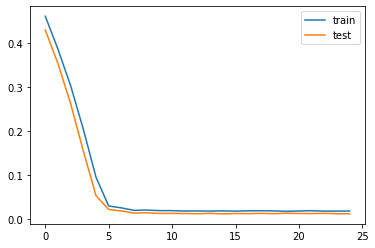

In [135]:
from keras.layers import Bidirectional

# design network
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto', patience=10,restore_best_weights=True)
model1 = Sequential()
model1.add(Bidirectional(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]))))
model1.add(Dropout(0.1))
model1.add(Dense(test_y.shape[1]))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])

# fit network
history1 = model1.fit(train_X, train_y, epochs=600, callbacks=[callback], batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [136]:
yhat = model1.predict(test_X)
Loss, accuracy = model1.evaluate(test_X, test_y)
print('Accuracy: %.4f' % (accuracy*100))

# calculate Loss
print('Loss: %.6f' % Loss)

176/176 [==============================] - 0s 799us/step - loss: 0.0117 - accuracy: 0.9929
Accuracy: 99.2889
Loss: 0.011739


In [137]:
# make a prediction
yhat = model1.predict(test_X)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)

# make a prediction
yhat2 = model1.predict(train_X)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmseL = rmse
print('Test RMSE: %.6f' % rmse)

# invert scaling for forecast
inv_yhat2 = scaler.inverse_transform(yhat2)
# invert scaling for actual
inv_y2 = scaler.inverse_transform(train_y)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Train RMSE: %.6f' % rmse)

import numpy as np
inv_f = np.concatenate((inv_yhat2, inv_yhat), axis=0)
inv_f

inv_o = np.concatenate((inv_y2, inv_y), axis=0)
inv_f,inv_o

Test RMSE: 31.220807
Train RMSE: 26.727960


(array([[ -678.94415, -1377.2632 ],
        [ -628.1288 , -1388.2694 ],
        [ -577.3304 , -1399.2443 ],
        ...,
        [ 1432.7928 , -2218.6675 ],
        [ 1486.3173 , -2258.855  ],
        [ 1539.7848 , -2298.9656 ]], dtype=float32),
 array([[ -636.4114 , -1391.7083 ],
        [ -585.85455, -1402.4039 ],
        [ -535.3616 , -1413.0743 ],
        ...,
        [ 1472.6523 , -2278.9023 ],
        [ 1526.782  , -2320.7615 ],
        [ 1580.9297 , -2362.6262 ]], dtype=float32))

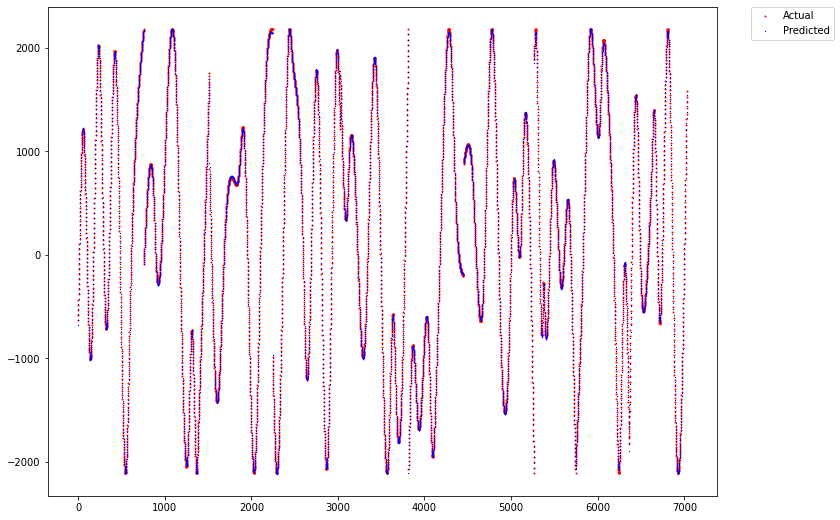

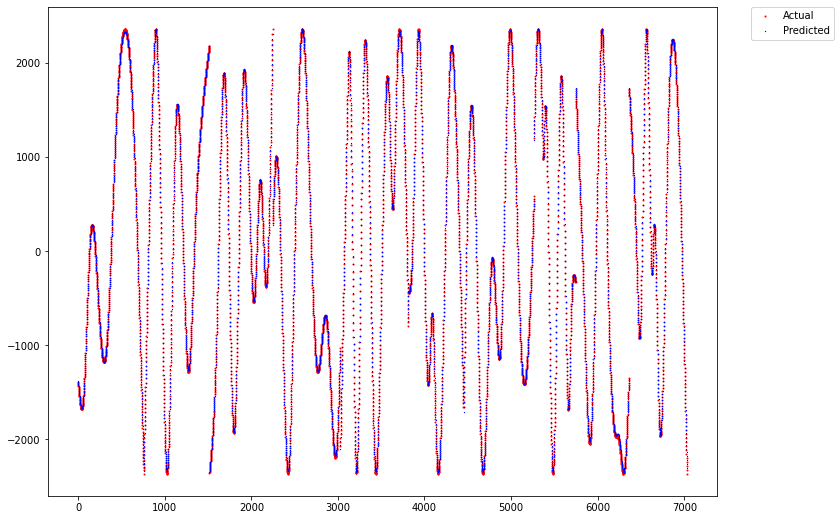

In [138]:
fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_o)),pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_f)),pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [139]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,0], inv_yhat2[:,0]))
print('RMSE for X in Train dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y2[:,1], inv_yhat2[:,1]))
print('RMSE for Y in Train dataset: %.6f' % rmse)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('RMSE for X in Test dataset: %.6f' % rmse)
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('RMSE for Y in Test dataset: %.6f' % rmse)

RMSE for X in Train dataset: 26.397155
RMSE for Y in Train dataset: 27.054737
RMSE for X in Test dataset: 29.741072
RMSE for Y in Test dataset: 32.633492


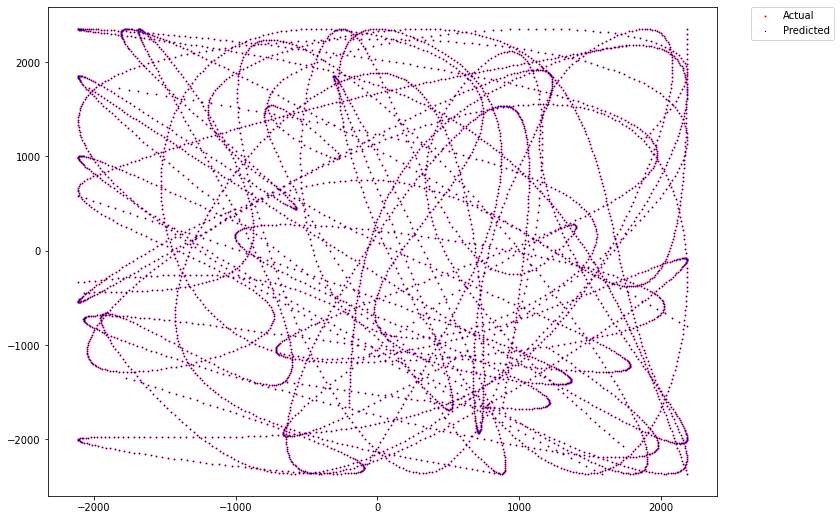

In [140]:

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Feed random 6 paths to ML for predicting

In [141]:
traj11 = pd.read_csv('UE5_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj12 = pd.read_csv('UE5_18-11-2021_23-53-21.csv', low_memory=False,  header=None)
traj13 = pd.read_csv('UE6_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj14 = pd.read_csv('UE7_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj15 = pd.read_csv('UE8_18-11-2021_23-53-03.csv', low_memory=False,  header=None)
traj16 = pd.read_csv('UE9_18-11-2021_23-53-04.csv', low_memory=False,  header=None)

traj11.columns = ["X", "Y", "Speed", "Time"]
traj12.columns = ["X", "Y", "Speed", "Time"]
traj13.columns = ["X", "Y", "Speed", "Time"]
traj14.columns = ["X", "Y", "Speed", "Time"]
traj15.columns = ["X", "Y", "Speed", "Time"]
traj16.columns = ["X", "Y", "Speed", "Time"]

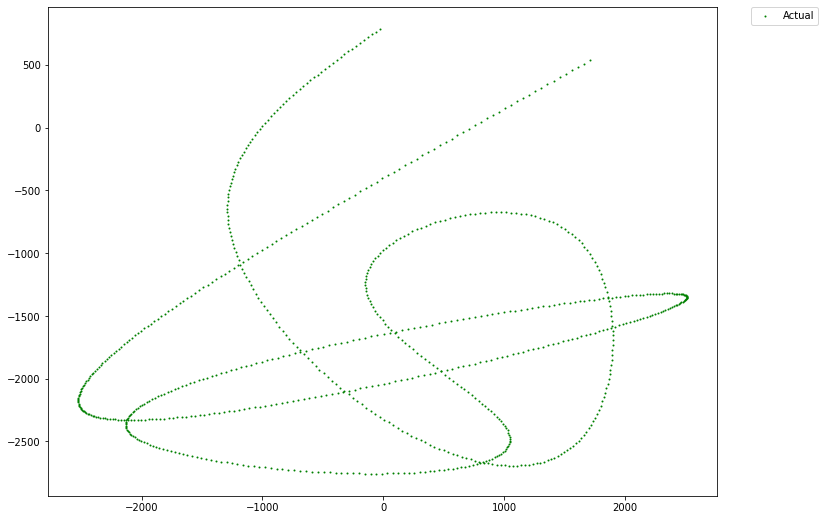

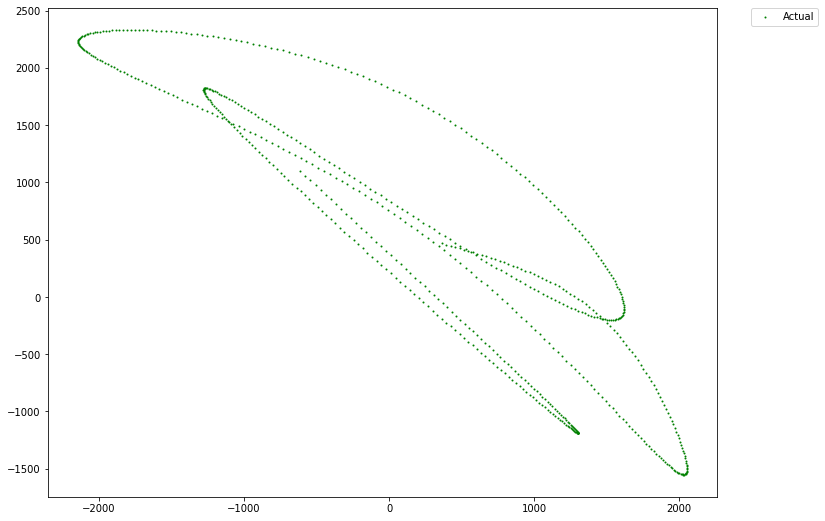

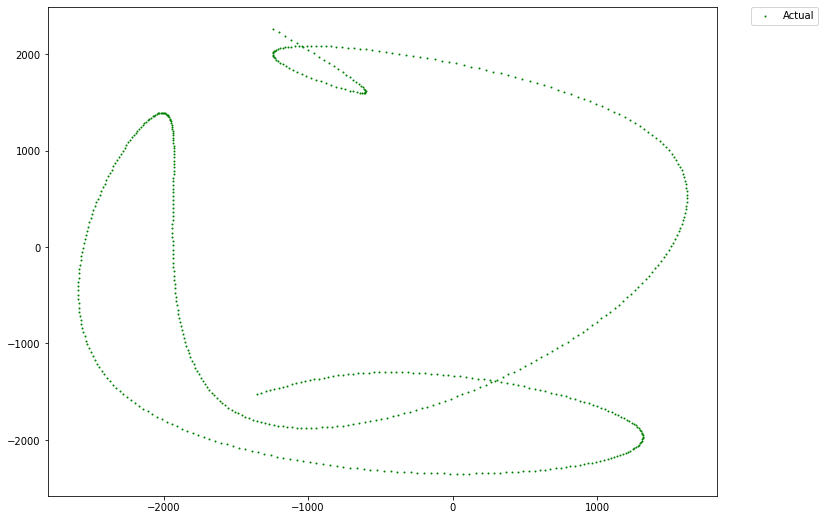

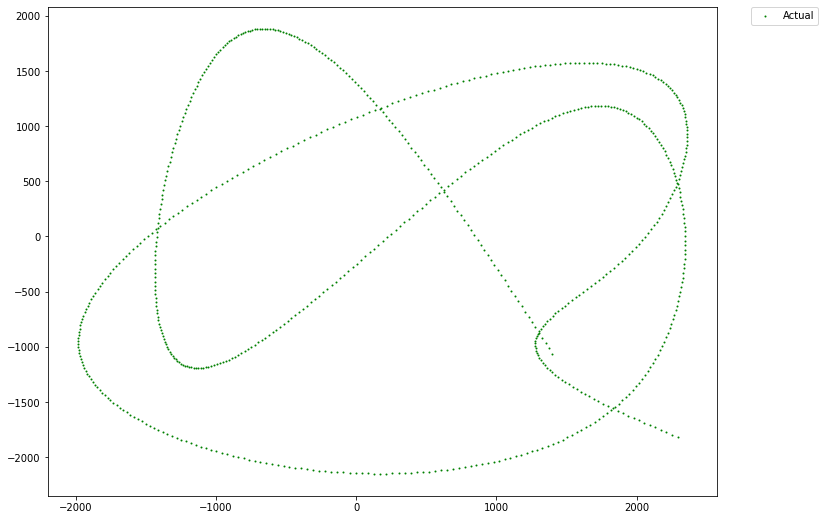

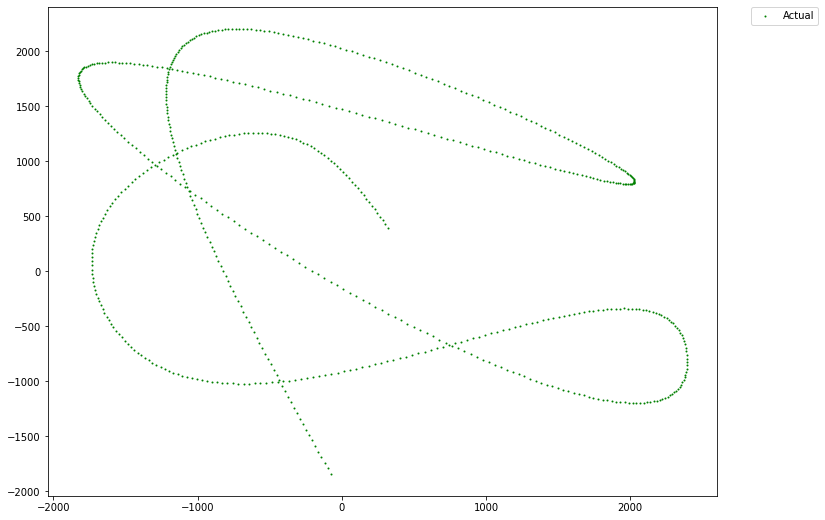

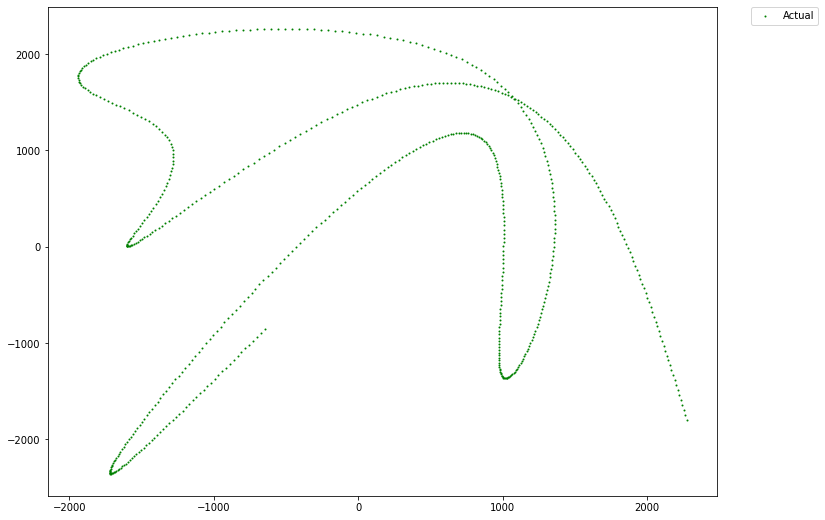

In [142]:
fig = plt.figure(figsize=(12,9))
plt.scatter(traj11['X'],traj11['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj12['X'],traj12['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj13['X'],traj13['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj14['X'],traj14['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


fig = plt.figure(figsize=(12,9))
plt.scatter(traj15['X'],traj15['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(traj16['X'],traj16['Y'],marker='o',c='g',s=1,alpha=1, label="Actual")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [143]:
new_df = traj11


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = new_df[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print("   Feature Varables       Target Varables")
print(reframed.head())


   Feature Varables       Target Varables
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.007235   1.000000 -0.020468  0.987268
2  -0.020468   0.987268 -0.033693  0.974534
3  -0.033693   0.974534 -0.046902  0.961794
4  -0.046902   0.961794 -0.060086  0.949046
5  -0.060086   0.949046 -0.073238  0.936288


Test RMSE: 30.524798


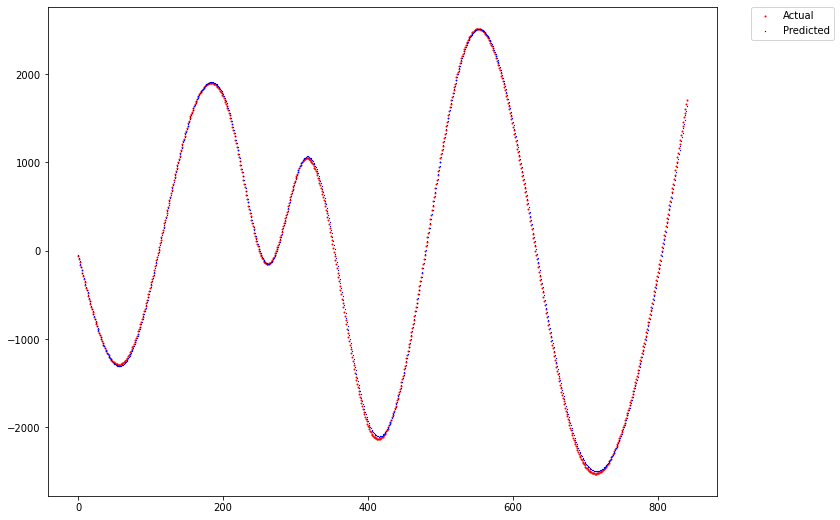

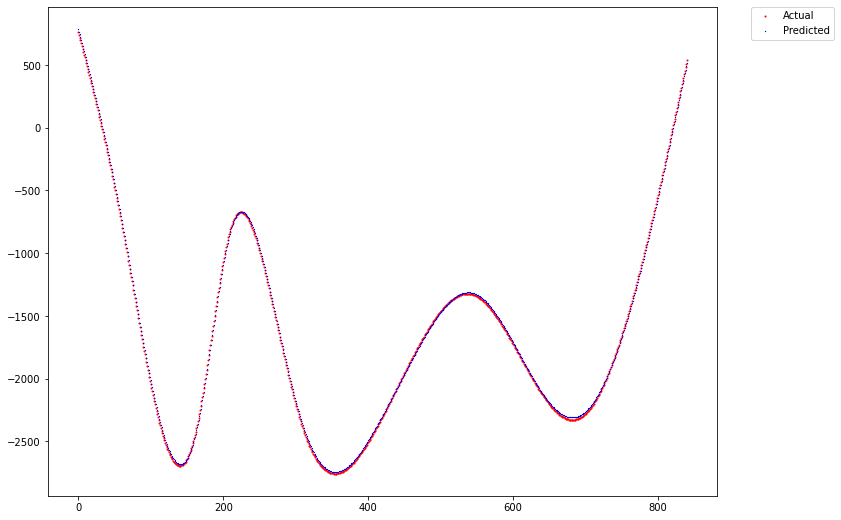

In [144]:

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



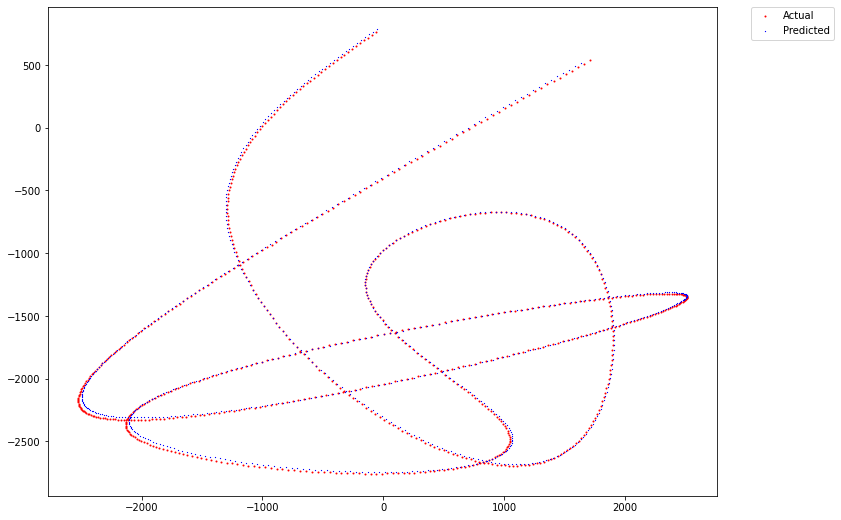

In [145]:
import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [146]:
new_df_2 = traj12
new_df_3 = traj13
new_df_4 = traj14
new_df_5 = traj15
new_df_6 = traj16



#Multi-input
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

# load dataset
dataset = new_df_2[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler2.fit_transform(values)
# frame as supervised learning
reframed_2 = series_to_supervised(scaled, 1, 1)

print(reframed_2.head())

# load dataset
dataset = new_df_3[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler3.fit_transform(values)
# frame as supervised learning
reframed_3 = series_to_supervised(scaled, 1, 1)
print(reframed_3.head())

# load dataset
dataset = new_df_4[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler4 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler4.fit_transform(values)
# frame as supervised learning
reframed_4 = series_to_supervised(scaled, 1, 1)
print(reframed_4.head())

# load dataset
dataset = new_df_5[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler5 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler5.fit_transform(values)
# frame as supervised learning
reframed_5 = series_to_supervised(scaled, 1, 1)
print(reframed_5.head())


 
# load dataset
dataset = new_df_6[['X','Y']]
#dataset = pd.DataFrame(new_df)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler6 = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler6.fit_transform(values)
# frame as supervised learning
reframed_6 = series_to_supervised(scaled, 1, 1)
print(reframed_6.head())


   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.193600   0.040214  0.208384  0.034464
2   0.208384   0.034464  0.223163  0.028703
3   0.223163   0.028703  0.237933  0.022917
4   0.237933   0.022917  0.252690  0.017096
5   0.252690   0.017096  0.267429  0.011227
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1  -0.358560   1.000000 -0.339068  0.983772
2  -0.339068   0.983772 -0.319647  0.967590
3  -0.319647   0.967590 -0.300369  0.951499
4  -0.300369   0.951499 -0.281308  0.935545
5  -0.281308   0.935545 -0.262534  0.919775
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.557885  -0.460778  0.546653 -0.437089
2   0.546653  -0.437089  0.535421 -0.413406
3   0.535421  -0.413406  0.524191 -0.389734
4   0.524191  -0.389734  0.512964 -0.366079
5   0.512964  -0.366079  0.501738 -0.342445
   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.017904   0.105552  0.009089  0.122147
2   0.009089   0.122147  0.000266  0.138720
3   0.000266   0.138720 -0.008575  0.155248
4  -0.008575   0.155248 -0.01744

Test RMSE: 31.266886


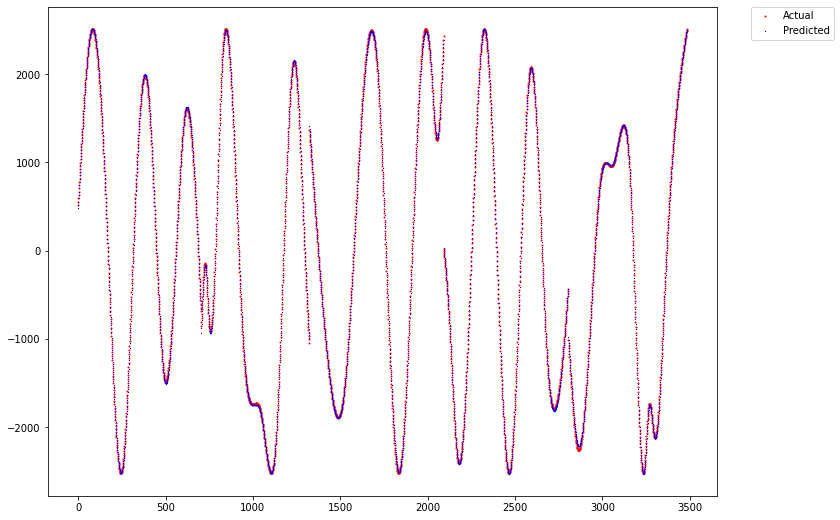

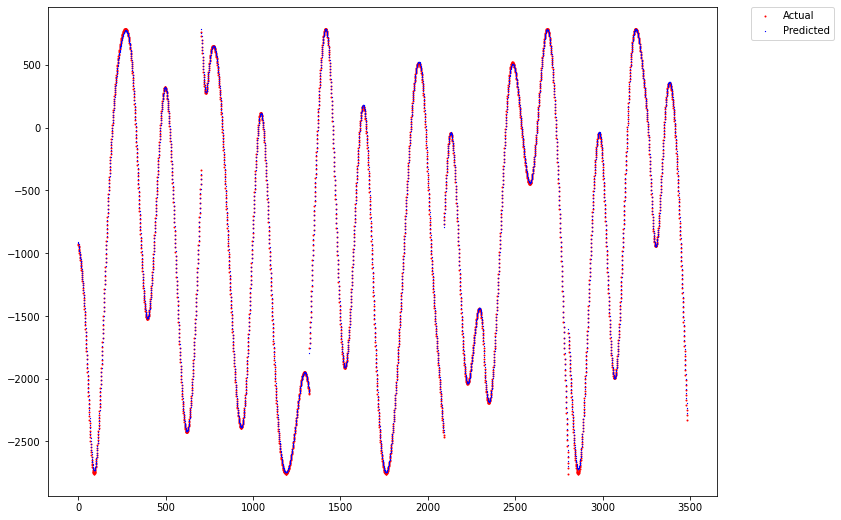

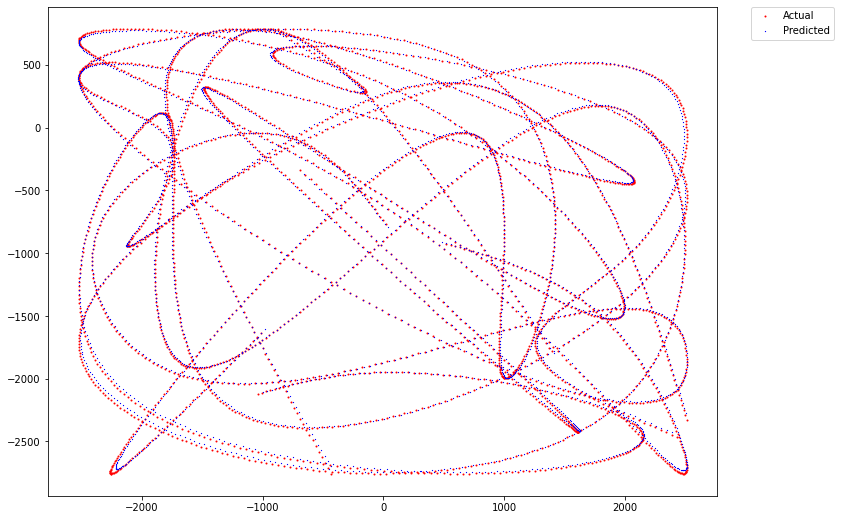

In [147]:
frames = [reframed_2, reframed_3,reframed_4,reframed_5,reframed_6]
result = pd.concat(frames)
reframed = pd.DataFrame(result)

reframed = reframed.reset_index()
reframed = reframed.drop(['index'], axis=1)
reframed.tail()

reframed.iloc[:,0:2].values,reframed.iloc[:,2:4].values

R0 = reframed.iloc[:,0:2].values
R0 = R0.reshape((R0.shape[0], 1, R0.shape[1]))
R0

R1 = reframed.iloc[:,2:4].values

yhat = model1.predict(R0)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(R1)
inv_yhat,inv_y

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.6f' % rmse)


fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[0],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[0],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig = plt.figure(figsize=(12,9))
plt.scatter(range(0,len(inv_y)),pd.DataFrame(inv_y)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(range(0,len(inv_yhat)),pd.DataFrame(inv_yhat)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the  right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

import numpy as np
inv_f =  inv_yhat


inv_o = inv_y
inv_f,inv_o

fig = plt.figure(figsize=(12,9))
plt.scatter(pd.DataFrame(inv_o)[0],pd.DataFrame(inv_o)[1],marker='o',c='r',s=1,alpha=1, label="Actual")
plt.scatter(pd.DataFrame(inv_f)[0],pd.DataFrame(inv_f)[1],marker='^',c='b',s=0.1,alpha=1, label="Predicted")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()